### Get data info

In [2]:
#dataframe info
df.info

#check null value
df.isnull().sum()

#Shape
df.shape

#Column distribution summary
df.describe().transpose()#.round(1)

#Make sure to check and convert some fields into the proper types before feeding into the model

### Join or stack dataframes

In [ ]:
#Left join example
joined_df = df1.merge(df2,
               left_on='uid_s', right_on='uid_s', how='left')

In [ ]:
#Stack two df on top of each other
c = pd.concat([a,b],ignore_index=True)

### Filter & Sort Value

In [ ]:
#Example: select country = keny and with system crisis. Sort by year column
df[(df['country']=='Kenya') & (df['systemic_crisis']==1)].sort_values('year')

#Sort in descending order 
df[df['country']=="Algeria"].sort_values('exch_usd',ascending=False)

### Group by and Aggregate

In [ ]:
#Examples
df.groupby('country').count()['systemic_crisis']
df.groupby('A')['B'].mean()

### Drop Columns

In [ ]:
df.drop(['column_name'],axis = 1,inplace = True)

### Visualize Data

- Make sure to do this exploration in case some column has different unit within itself. E.g a column mix with cm & m

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#For binary classification
final_df['target'].value_counts()

In [ ]:
#Bar Chart visualize target class distribution
sns.countplot(x='target',data=final_df)

In [ ]:
#Distribution plot of a continuous variable
#Example: Spend distribution on users 
plt.figure(figsize=(12,4))
sns.distplot(final_df['total_spend'],kde=False,bins=50)
#plt.xlim(0,500) #Set value limit

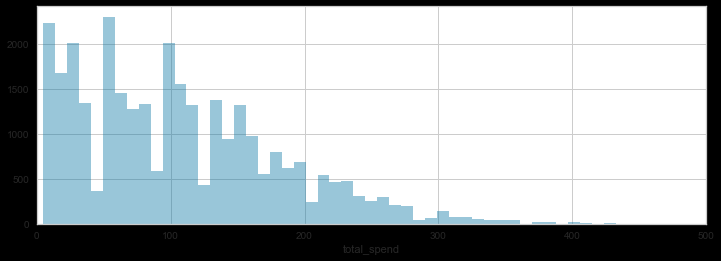

In [5]:
#Distribution plot of multiple column together

#Input: dataframe, cols is a list of col names, n column is the number of col in the final plot

def dfdisplot(df, cols, rowSize=3, colSize=3, nCol=3):
    if len(cols) % nCol == 0:
        nRow= len(cols)// nCol
    else:
        nRow= len(cols)// nCol + 1
    fig,axes = plt.subplots(nRow,nCol,figsize=(nCol*colSize, nRow*rowSize))
    axes = axes.flatten()
    for i, var_name in enumerate(cols):
        g = sns.distplot(df[var_name],ax= axes[i]);
     
    fig.tight_layout()
    fig.show()

### Handling Null Value (raw method)

In [7]:
#Fill with mean
df.fillna(df.mean())

In [ ]:
#drop null value rows based on column
df = df.dropna(axis=0, subset=['based_on_column'])

### String Manipulation & Format Cleaning

In [ ]:
#Example
#convert string showing as '120\80' to '120/80'
def string_modify(x):
    return x.replace('\\', "/")

In [12]:
#Extract numbers from a fraction string like 120/80 as two variables 
nominator, denominator = '120/80'.split('/')

int(denominator)

80

### Generalize the dataframe cleaning

In [ ]:
#Example
def data_prep(df):
    df['gender'] = df['gender'].apply(lambda x: cleaning_gender(x))
    df['pressure'] = df['pressure'].apply(lambda x: press_cleaning(x))
    df['pressure_high'] = df['pressure'].apply(lambda x:press_high(x) )
    df['pressure_low'] = df['pressure'].apply(lambda x:press_low(x) )
    df['age'] = df['age'].apply(lambda x: clean_age(x))
    df['pressure_pct'] = df['pressure_high']/df['pressure_low']
    
    return df